# Processing

In [1]:
#Installation des pacakges
#!pip install scikit-learn
#!pip install matplotlib
#!pip install seaborn
#!pip install pandas
#!pip install numpy

In [78]:
import seaborn as sns
import numpy as np #  manip des arrays (tableaux)
import pandas as pd #  manip des dataframes
import matplotlib.pyplot as plt #  construct des graphes : barplot, cammenberts
from sklearn.cluster import KMeans

In [79]:
#loading du data avec pandas
data = pd.read_csv('../data/Summer-Olympic-medals-1976-to-2008.csv', index_col='Event_gender', encoding='Latin-1')
data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Medal
Event_gender,,,,,,,,,,
W,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,Silver
M,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,Bronze
M,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,Gold
M,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,Silver
W,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,Bronze
...,...,...,...,...,...,...,...,...,...,...
M,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,Bronze
M,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,Gold
M,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,Silver


In [4]:
#Verification des lignes vides
data.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Medal           117
dtype: int64

In [5]:
#Suppression des na
data.dropna(inplace=True)

In [6]:
#Réverification des lignes vides
data.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Medal           0
dtype: int64

In [7]:
data.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [8]:
data.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Medal            object
dtype: object

In [9]:
data.describe(include=['O'])

,City,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Medal
count,15316,15316,15316,15316,15316,15316,15316,15316,15316
unique,9,28,41,293,11337,2,128,127,3
top,Beijing,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,Bronze
freq,2042,2210,1523,817,16,9388,1992,1992,5258


In [10]:
#Conversion de Year en int
data['Year'] = data['Year'].astype(int)
data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Medal
Event_gender,,,,,,,,,,
W,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,Silver
M,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,Bronze
M,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,Gold
M,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,Silver
W,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,Bronze
...,...,...,...,...,...,...,...,...,...,...
M,Beijing,2008,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,Bronze
M,Beijing,2008,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,Gold
M,Beijing,2008,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,Silver


In [11]:
#drop duplicates
data.drop_duplicates()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Medal
Event_gender,,,,,,,,,,
W,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,Silver
M,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,Bronze
M,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,Gold
M,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,Silver
W,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,Bronze
...,...,...,...,...,...,...,...,...,...,...
M,Beijing,2008,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,Bronze
M,Beijing,2008,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,Gold
M,Beijing,2008,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,Silver


In [12]:
#Total Medals by country
medals_country = data.groupby(['Country']).Medal.size()
medals_country
df_medals_country = pd.DataFrame(medals_country)
df_medals_country

,Medal
Country,
Afghanistan,1
Algeria,14
Argentina,153
Armenia,9
Australia,798
...,...
Virgin Islands*,1
West Germany,345
Yugoslavia,278


In [13]:
#Total Athlete by country
athlete_country = data.groupby(['Country', 'Year']).Athlete.size()
athlete_country
df_athlete_country = pd.DataFrame(athlete_country)
df_athlete_country

Athlete
Country     Year         
Afghanistan 2008        1
Algeria     1984        2
            1992        2
            1996        3
            2000        5
...                   ...
Zambia      1984        1
            1996        1
Zimbabwe    1980       16
            2004        3
            2008        4

[559 rows x 1 columns]

In [14]:
#Total Medals gold by country
total_gold_country = data[data['Medal'] == 'Gold'].groupby(['Country']).Medal.size()
total_gold_country.sort_values(ascending = True)
df_total_gold_country = pd.DataFrame(total_gold_country)
df_total_gold_country.sort_values(by = ['Medal'])

,Medal
Country,
Burundi,1
Suriname,1
Armenia,1
United Arab Emirates,1
Israel,1
...,...
China,234
Germany,237
East Germany,286


In [15]:
#Total Medals gold by country
medals_country = data.groupby(['Country']).Medal.size()
medals_country
df_medals_country = pd.DataFrame(medals_country)
df_medals_country

,Medal
Country,
Afghanistan,1
Algeria,14
Argentina,153
Armenia,9
Australia,798
...,...
Virgin Islands*,1
West Germany,345
Yugoslavia,278


In [16]:
#Total Medals gold by country
medals_country = data.groupby(['Country']).Medal.size()
medals_country
df_medals_country = pd.DataFrame(medals_country)
df_medals_country

,Medal
Country,
Afghanistan,1
Algeria,14
Argentina,153
Armenia,9
Australia,798
...,...
Virgin Islands*,1
West Germany,345
Yugoslavia,278


In [17]:
#Liste des pays
countries = data.Country.unique()
len(countries)

127

In [18]:
#Nombre de médailles d'or par pays
gold_country = data[data.Medal == 'Gold'].groupby(['Country']).Medal.size()
gold_country
df_gold_country = pd.DataFrame(gold_country)
df_gold_country

,Medal
Country,
Algeria,4
Argentina,46
Armenia,1
Australia,216
Austria,9
...,...
United States,928
Uzbekistan,4
West Germany,84


In [19]:
#Medals silver by country
silver_country = data[data.Medal == 'Silver'].groupby(['Country']).Medal.size()
silver_country

df_silver_country = pd.DataFrame(silver_country)
df_silver_country

,Medal
Country,
Algeria,2
Argentina,37
Armenia,1
Australia,270
Austria,17
...,...
Virgin Islands*,1
West Germany,135
Yugoslavia,86


In [20]:
# Medals bronze by country
bronze_country = data[data.Medal == 'Bronze'].groupby(['Country']).Medal.size()
bronze_country

df_bronze_country = pd.DataFrame(bronze_country)
df_bronze_country

,Medal
Country,
Afghanistan,1
Algeria,8
Argentina,70
Armenia,7
Australia,312
...,...
Venezuela,6
West Germany,126
Yugoslavia,102


In [21]:
#Top 10 gold

gold_top_10 = gold_country.sort_values(ascending = False)[:10]
gold_top_10

df_gold_top_10 = pd.DataFrame(gold_top_10)
df_gold_top_10

,Medal
Country,
United States,928
Soviet Union,439
East Germany,286
Germany,237
China,234
Australia,216
Russia,192
France,154
Cuba,152


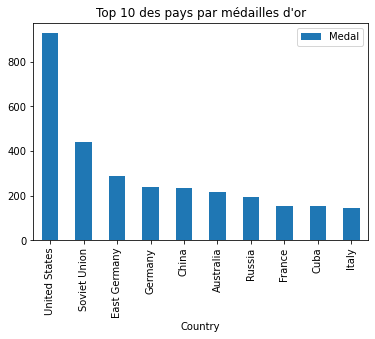

In [22]:
#Top 10 des pays par médailles d'or
df_gold_top_10.plot(kind='bar', title="Top 10 des pays par médailles d'or")

In [23]:
#Top 10 silver
silver_top_10 = silver_country.sort_values(ascending = False)[:10]
silver_top_10

df_silver_top_10 = pd.DataFrame(silver_top_10)
df_silver_top_10

,Medal
Country,
United States,583
Soviet Union,285
Australia,270
China,252
Russia,206
East Germany,190
"Korea, South",186
Germany,176
Spain,165


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f2b9c6130>],
      dtype=object)

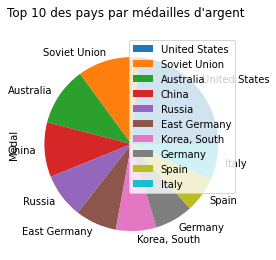

In [24]:
#Top 10 des pays par médailles d'argent
df_silver_top_10.plot(kind='pie', subplots=True, title="Top 10 des pays par médailles d'argent")

In [25]:
#Top 10 bronze
bronze_top_10 = bronze_country.sort_values(ascending = False)[:10]
bronze_top_10

Country
United States     481
Australia         312
Soviet Union      297
Germany           278
Russia            240
China             193
Romania           190
United Kingdom    188
France            185
Japan             182
Name: Medal, dtype: int64

In [26]:
df_bronze_top_10 = pd.DataFrame(bronze_top_10)
df_bronze_top_10

,Medal
Country,
United States,481
Australia,312
Soviet Union,297
Germany,278
Russia,240
China,193
Romania,190
United Kingdom,188
France,185


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f2bbbecd0>],
      dtype=object)

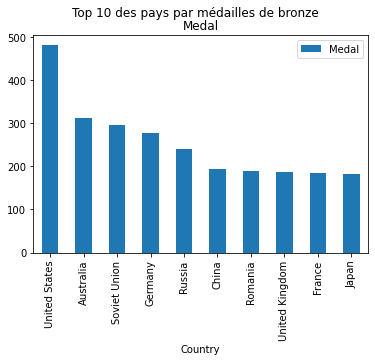

In [27]:
#Top 10 des pays par médailles de bronze
df_bronze_top_10.plot(kind='bar', subplots=True, title="Top 10 des pays par médailles de bronze")

In [28]:
#Discipline avec plus de Medal
discipline_medal_count = data.groupby(['Discipline']).Medal.size()
discipline_medal_count

Discipline
Archery             162
Artistic G.         672
Athletics          1523
BMX                   6
Badminton           120
Baseball            335
Basketball          646
Beach volley.        48
Boxing              416
Canoe / Kayak F     597
Canoe / Kayak S      75
Cycling Road        131
Cycling Track       322
Diving              180
Dressage            135
Eventing            148
Fencing             606
Football            669
Handball            780
Hockey              817
Judo                396
Jumping             140
Modern Pentath.      81
Mountain Bike        24
Rhythmic G.          93
Rowing             1377
Sailing             417
Shooting            345
Softball            180
Swimming           1422
Synchronized S.     153
Table Tennis        120
Taekwondo            80
Tennis              118
Trampoline           18
Triathlon            18
Volleyball          647
Water polo          455
Weightlifting       311
Wrestling Free.     281
Wrestling Gre-R     252
Name:

In [29]:
top_athlete = data[data.Medal == 'Gold'].groupby(['Athlete', 'Country', 'Sport']).Medal.size()
top_athlete = top_athlete[top_athlete>5].sort_values(ascending = False)
top_athlete = pd.DataFrame(top_athlete).reset_index()
top_athlete.columns = ['Athlete', 'Country', 'Sport', 'Gold medals']
top_athlete

,Athlete,Country,Sport,Gold medals
0,"PHELPS, Michael",United States,Aquatics,14
1,"LEWIS, Carl",United States,Athletics,9
2,"THOMPSON, Jenny",United States,Aquatics,8
3,"BIONDI, Matthew",United States,Aquatics,8
4,"VAN DYKEN, Amy",United States,Aquatics,6
5,"SCHERBO, Vitaly",Unified team,Gymnastics,6
6,"OTTO, Kristin",East Germany,Aquatics,6
7,"ANDRIANOV, Nikolay",Soviet Union,Gymnastics,6


In [30]:
aqua = data[data.Sport == 'Aquatics'].groupby(['Country']).Medal.size()
top_10_aqua = aqua.sort_values(ascending = False)[:10]
aqua = pd.DataFrame(top_10_aqua).reset_index()
aqua.columns = ['Country', 'Medals']
aqua

,Country,Medals
0,United States,578
1,Australia,239
2,Russia,125
3,China,118
4,East Germany,109
5,Germany,100
6,Hungary,92
7,Soviet Union,91
8,Canada,89
9,Netherlands,83


# New data after proces

In [31]:
### Data Analysis

new_data = df_medals_country.merge(df_total_gold_country, suffixes=('', '_gold') , on='Country', how='left')
new_data = new_data.merge(df_silver_country, suffixes=('', '_silver'), on='Country', how='left') 
new_data = new_data.merge(df_bronze_country, suffixes=('', '_bronze'), on='Country', how='left')

new_data = new_data.fillna(0)
new_data


,Medal,Medal_gold,Medal_silver,Medal_bronze
Country,,,,
Afghanistan,1,0.0,0.0,1.0
Algeria,14,4.0,2.0,8.0
Argentina,153,46.0,37.0,70.0
Armenia,9,1.0,1.0,7.0
Australia,798,216.0,270.0,312.0
...,...,...,...,...
Virgin Islands*,1,0.0,1.0,0.0
West Germany,345,84.0,135.0,126.0
Yugoslavia,278,90.0,86.0,102.0


In [32]:
#loading du data avec pandas
data = pd.read_csv('../data/athlete_events.csv')
data = data[data['Season'] == 'Summer']
data = data[data['Year'] >= 1976]
data = data[data['Year'] <= 2008]

data.drop_duplicates()

data
data_to_process = data.filter(['Team','Year', 'Name'], axis=1)
data_to_process = pd.DataFrame(data_to_process)
number_of_participant = data_to_process.groupby(['Team']).size()
data_to_process = pd.DataFrame(number_of_participant)
data_to_process.index.names = ['Country']
data_to_process.rename(columns= {0:'number_of_participant'}, inplace=True)
data_to_process.head(30)

,number_of_participant
Country,
Afghanistan,27
Albania,42
Algeria,403
American Samoa,27
Andorra,43
Angola,206
Antigua and Barbuda,120
Argentina,1164
Argentina-1,6


In [33]:
#merge data_to_process
new_data = new_data.merge(data_to_process, on='Country', how='left')
new_data.fillna(0)

,Medal,Medal_gold,Medal_silver,Medal_bronze,number_of_participant
Country,,,,,
Afghanistan,1,0.0,0.0,1.0,27.0
Algeria,14,4.0,2.0,8.0,403.0
Argentina,153,46.0,37.0,70.0,1164.0
Armenia,9,1.0,1.0,7.0,109.0
Australia,798,216.0,270.0,312.0,3978.0
...,...,...,...,...,...
Virgin Islands*,1,0.0,1.0,0.0,0.0
West Germany,345,84.0,135.0,126.0,1535.0
Yugoslavia,278,90.0,86.0,102.0,612.0


In [34]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# for col in data.columns :
#     if data[col].dtypes == 'object' :
#         data[col] = le.fit_transform(data[col])
        
# # le.fit(data['Medal']);
# # data['Medal'] = le.transform(data['Medal'])

# # le.fit(data['Gender']);
# # data['Gender'] = le.transform(data['Gender'])

# # le.fit(data['Sport']);
# # data['Sport'] = le.transform(data['Sport'])

# # le.fit(data['Country']);
# # data['Country'] = le.transform(data['Country'])
# data

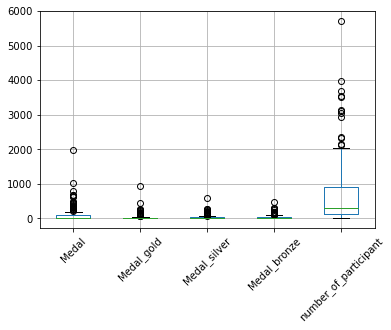

In [35]:
# boxplot without preprocessing
new_data.boxplot(rot=45)

In [36]:
corr = new_data.corr()
corr

,Medal,Medal_gold,Medal_silver,Medal_bronze,number_of_participant
Medal,1.000000,0.973440,0.985666,0.968342,0.854938
Medal_gold,0.973440,1.000000,0.936863,0.895300,0.756335
Medal_silver,0.985666,0.936863,1.000000,0.955744,0.878681
Medal_bronze,0.968342,0.895300,0.955744,1.000000,0.896779
number_of_participant,0.854938,0.756335,0.878681,0.896779,1.000000


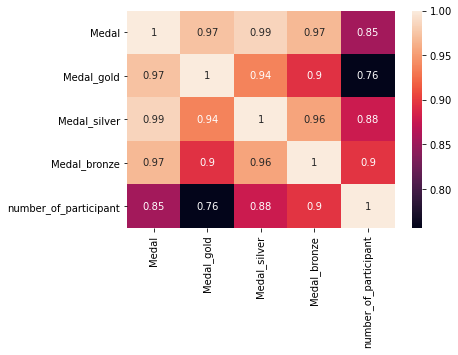

In [37]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)#

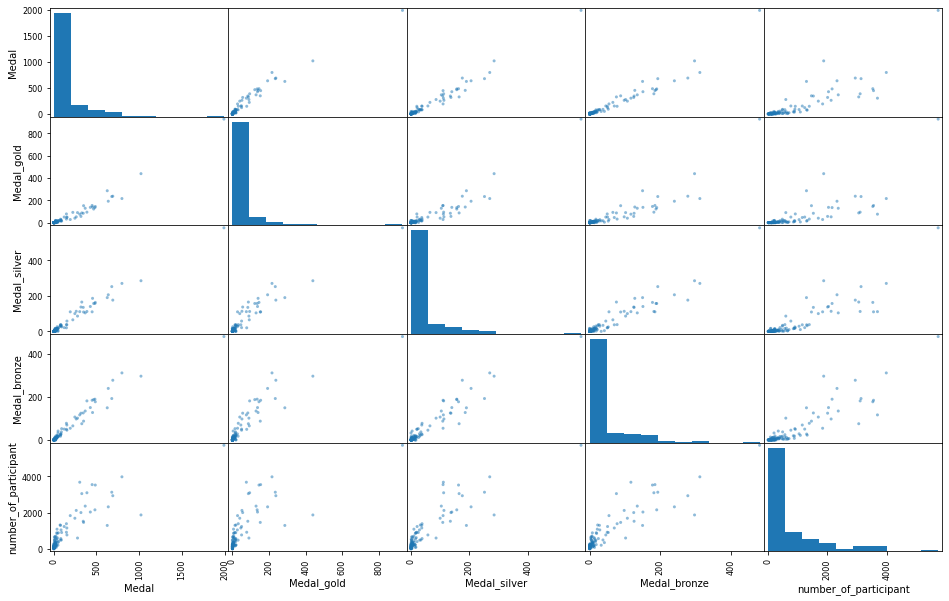

In [38]:
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(new_data, figsize = (16,10))

In [39]:
#data = data.filter(['Sport','Medal','Gender','Year', 'Country'], axis=1)

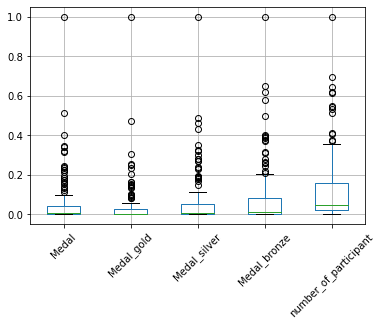

In [40]:
#Preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = min_max.fit_transform(new_data)
df_minmax = pd.DataFrame(df_minmax, columns=new_data.columns, index=new_data.index)
df_minmax.boxplot(rot=45)

In [41]:
df_minmax

,Medal,Medal_gold,Medal_silver,Medal_bronze,number_of_participant
Country,,,,,
Afghanistan,0.000000,0.000000,0.000000,0.002079,0.001404
Algeria,0.006529,0.004310,0.003431,0.016632,0.067416
Argentina,0.076344,0.049569,0.063465,0.145530,0.201018
Armenia,0.004018,0.001078,0.001715,0.014553,0.015801
Australia,0.400301,0.232759,0.463122,0.648649,0.695049
...,...,...,...,...,...
Virgin Islands*,0.000000,0.000000,0.001715,0.000000,NaN
West Germany,0.172777,0.090517,0.231561,0.261954,0.266152
Yugoslavia,0.139126,0.096983,0.147513,0.212058,0.104108


In [42]:
corr = new_data.corr()
corr

,Medal,Medal_gold,Medal_silver,Medal_bronze,number_of_participant
Medal,1.000000,0.973440,0.985666,0.968342,0.854938
Medal_gold,0.973440,1.000000,0.936863,0.895300,0.756335
Medal_silver,0.985666,0.936863,1.000000,0.955744,0.878681
Medal_bronze,0.968342,0.895300,0.955744,1.000000,0.896779
number_of_participant,0.854938,0.756335,0.878681,0.896779,1.000000


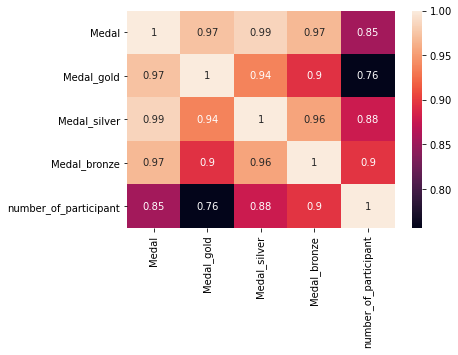

In [43]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [44]:
pd.DataFrame(df_minmax,columns=data.columns)
df_minmax = df_minmax.fillna(0)

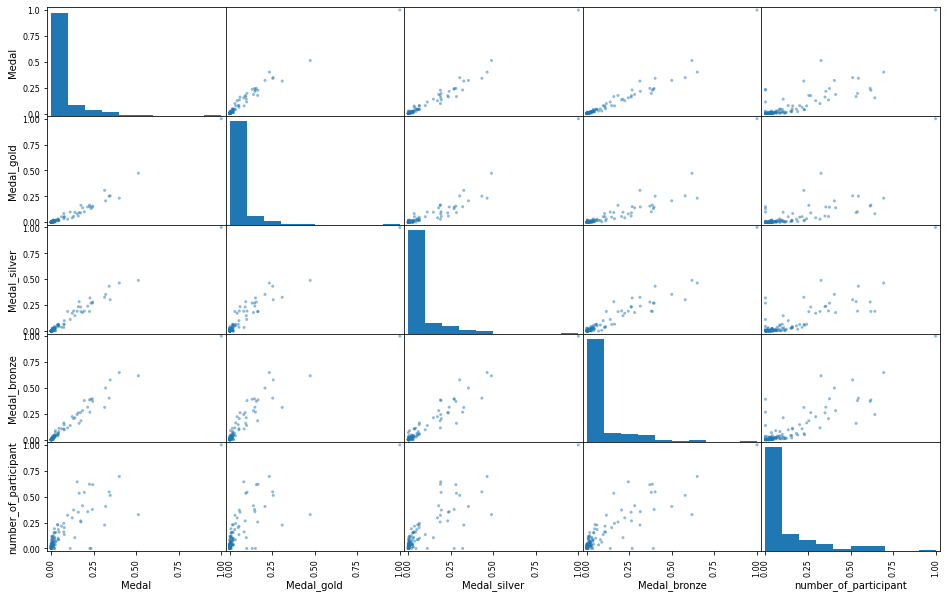

In [45]:
scatter_mat = scatter_matrix(df_minmax, figsize = (16,10))

In [46]:
#####  Nb optimal des clusters : méthode du coude       #####

# Stratégie : on fait varier le nbr de grpes, on surveille l’évolution de l'inertie et on cherche le « coude » dans le graphique.
# Inertia: Sum of distances of samples to their closest cluster center
# L'inertie tend à diminuer vers 0 lorsque ns augmentons k (et l'inertie est 0 lorsque k est égal au nombre de points de données => chaque point est un cluster !
# le coude représente généralement le point où nous commençons à avoir des rendements décroissants en augmentant k.
##### Centrage et réduction des données #####
#from sklearn.cluster import KMeans
#from sklearn import cluster
#from sklearn import preprocessing
#new_data = new_data.fillna(0)
#df_cr = preprocessing.scale(new_data)
#df_cr
#scores = {}
#for k in range(2, 11):
#    km = cluster.KMeans(n_clusters=k, random_state = 42)
#    km.fit(df_cr)
#    scores[k] = km.inertia_
#    print(f'*** For n_clusters = {k}, inertia is {km.inertia_} ***\n')
#plt.figure()
#plt.plot(list(scores.keys()), list(scores.values()))
#plt.xlabel("Number of cluster")
#plt.ylabel("inertia")
#plt.title("Optimal nb of clusters")
#plt.show()

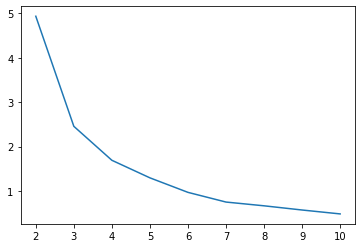

In [47]:
# Intérprétation statistique:
inertia=[]

for n_clusters in range(2,11):
    km = KMeans(n_clusters=n_clusters, random_state=0)
    km.fit(df_minmax)
    inertia.append(km.inertia_)

plt.plot(range(2,11), inertia)

In [87]:
from sklearn import preprocessing
df_cr = preprocessing.scale(new_data)

In [88]:
# kmeans sur le df remis à l'échelle df_minmax

km_minmax = KMeans(n_clusters=4, random_state=0)
km_minmax.fit(df_cr)

KMeans(n_clusters=4, random_state=0)

In [89]:
km_minmax.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 1, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0], dtype=int32)

# Interprétation

In [90]:
#Nombres de pays
new_data.index.value_counts()

Lebanon               1
Dominican Republic    1
Singapore             1
Norway                1
Suriname              1
                     ..
United States         1
Latvia                1
Uruguay               1
Kazakhstan            1
Virgin Islands*       1
Name: Country, Length: 127, dtype: int64

In [91]:
#Nombres de participant par cluster
new_data.number_of_participant.value_counts()

0.0      11
403.0     2
109.0     2
137.0     2
251.0     2
         ..
296.0     1
468.0     1
132.0     1
106.0     1
27.0      1
Name: number_of_participant, Length: 112, dtype: int64

In [92]:
#Nombres de pays ayant gagner des medailles
#df = pd.crosstab(new_data.index, new_data.Medal)
#df.sort_values(by=['row_0'],ascending=False).head(50)


# Prédiction

In [93]:
km_minmax

KMeans(n_clusters=4, random_state=0)

In [94]:
new_data = new_data.fillna(0)

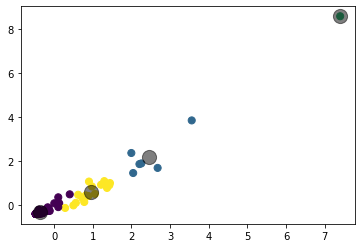

In [97]:
y_kmeans = km_minmax.predict(df_cr)
plt.figure()
plt.scatter(df_cr[ : , 0], df_cr[ : , 1], c=y_kmeans, s=50, cmap='viridis')
centers = km_minmax.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [101]:
## Affichage des observations et leurs groupes dans un df
df['cluster'] = km_minmax.labels_
df.sort_values('cluster', ascending=False)

Medal,1,2,3,4,5,6,7,8,9,11,...,482,486,626,638,679,691,798,1021,1992,cluster
row_0,,,,,,,,,,,,,,,,,,,,,
Poland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Italy,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
Cuba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Iceland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hong Kong*,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guyana,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
